# Charlotte Bate - Research Computing PS5: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [139]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [140]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716354 entries, 0 to 716353
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   SID       716354 non-null  object        
 1   SEASON    716354 non-null  int64         
 2   NUMBER    716354 non-null  int64         
 3   BASIN     716354 non-null  object        
 4   SUBBASIN  716354 non-null  object        
 5   NAME      390520 non-null  object        
 6   ISO_TIME  716354 non-null  datetime64[ns]
 7   NATURE    716354 non-null  object        
 8   LAT       716354 non-null  float64       
 9   LON       716354 non-null  float64       
 10  WMO_WIND  157570 non-null  float64       
 11  WMO_PRES  160275 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 65.6+ MB


In [142]:
df.shape

(716354, 12)

In [143]:
# There are 716314 rows in the dataset

How many North Atlantic hurricanes are in this dataset?

In [144]:
dfNA = df[df.BASIN == 'NA']
len(dfNA.SID.unique()) # Number of unique North Atlantic hurricanes in the dataset

2345

In [145]:
len(dfNA.SID) # Number of North Atlantic hurricanes in the dataset

126593

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [146]:
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [147]:
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [148]:
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [149]:
df = df.rename(columns={"WMO_WIND": "WIND", "WMO_PRES": "PRES"})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [150]:
df.nlargest(10, 'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
666142,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
666140,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
666144,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
427655,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
178210,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
482093,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
552477,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
605764,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [151]:
df.groupby('SID').max().nlargest(10,'WIND')

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0000,185.0,1007.0
1980214N11330,1980,57,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0000,165.0,1010.0
1935241N23291,1935,46,NA,NA,NaN,1935-09-10 12:00:00,TS,57.0,-31.1196,160.0,996.0
1988253N12306,1988,74,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0000,160.0,1008.0
1997253N12255,1997,81,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7000,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0000,160.0,1004.0
2019236N10314,2019,52,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4000,160.0,1011.0
1998295N12284,1998,89,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0000,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9000,155.0,1009.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

Text(0.5, 1.0, 'Windspeed of the 20 strongest-wind hurricanes')

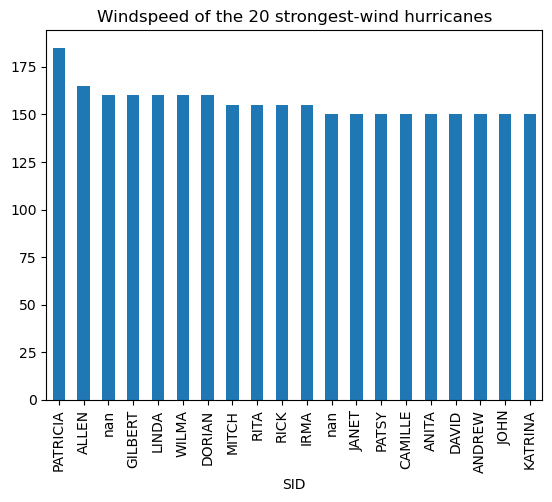

In [319]:
ax = df.groupby('SID').max().nlargest(20,'WIND').WIND.plot(kind='bar')
ax.set_xticklabels(df.groupby('SID').max().nlargest(20, 'WIND').NAME)
ax.set_title("Windspeed of the 20 strongest-wind hurricanes")

### 6) Plot the count of all datapoints by Basin

as a bar chart

Text(0.5, 1.0, 'Count of all hurricane datapoints by basin')

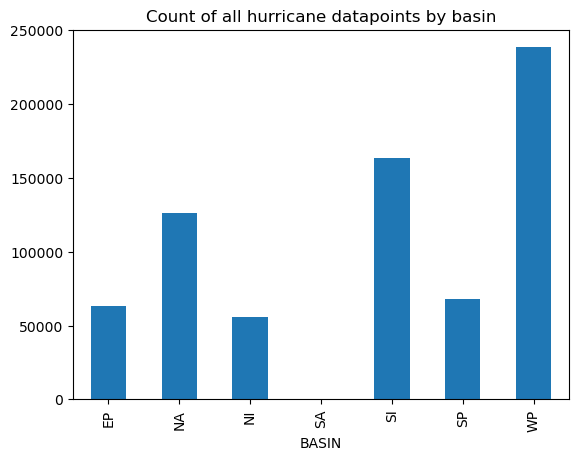

In [221]:
ax = df.groupby('BASIN').SID.count().plot(kind='bar')
ax.set_title("Count of all hurricane datapoints by basin")

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

Text(0.5, 1.0, 'Unique hurricane count by basin')

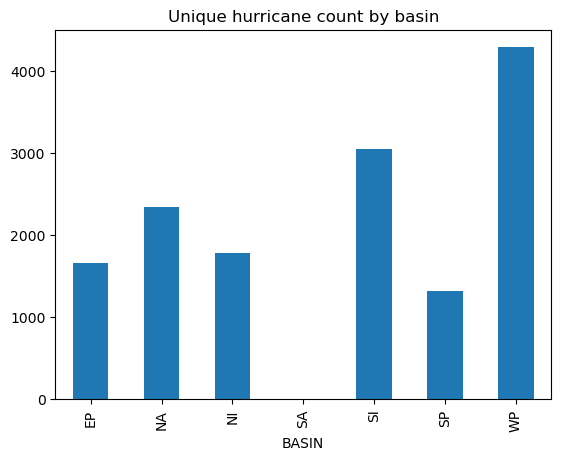

In [222]:
ax = df.groupby('BASIN').nunique().SID.plot(kind='bar')
ax.set_title("Unique hurricane count by basin")

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

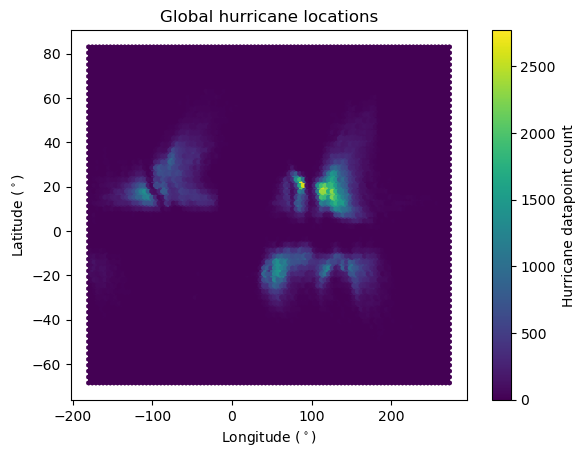

In [318]:
plt.hexbin(df.LON,df.LAT)
plt.xlabel("Longitude ($^\circ$)")
plt.ylabel("Latitude ($^\circ$)")
plt.title("Global hurricane locations")
cb = plt.colorbar()
cb.set_label(label='Hurricane datapoint count')

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [229]:
dfKAT = df[(df.NAME=='KATRINA') & (df.SEASON==2005)]
dfKAT.head()
dfKAT.SID.unique()

array(['2005236N23285'], dtype=object)

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

Text(0.5, 1.0, 'Hurricane Katrina (season 2005) track, colored by windspeed')

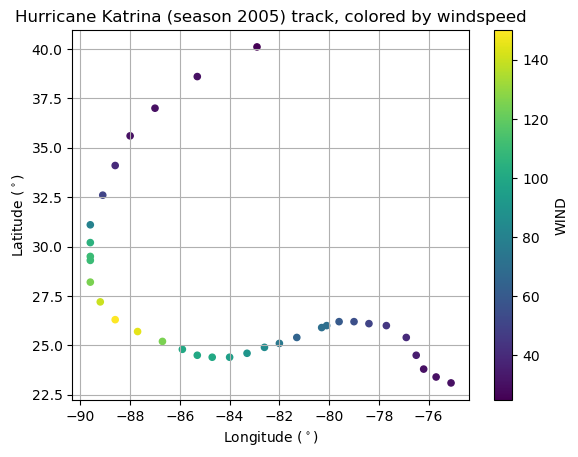

In [301]:
ax = dfKAT.plot.scatter(x='LON',y='LAT',c='WIND',grid=True)
ax.set_xlabel("Longitude ($^\circ$)")
ax.set_ylabel("Latitude ($^\circ$)")
ax.set_title("Hurricane Katrina (season 2005) track, colored by windspeed")

### 10) Make time the index on your dataframe

In [ ]:
df = df.set_index(['ISO_TIME'])
df.head()

### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

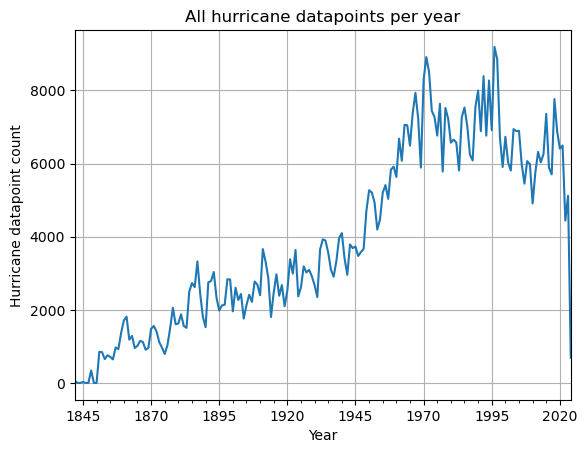

In [324]:
ax = df['SID'].resample('YE').count().plot()
ax.set_xlabel("Year")
ax.set_ylabel("Hurricane datapoint count")
ax.set_title("All hurricane datapoints per year")
ax.grid()

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

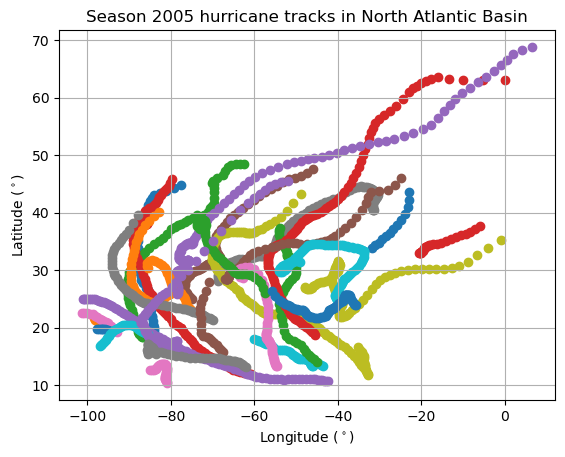

In [285]:
# Here I am interpreting 'in 2005' to mean 'in the 2005 season', not 'in the calendar year 2005'.

df2005NA = df[(df.BASIN=='NA') & (df.SEASON==2005)]
df2005NAgbSID = df2005NA.groupby('SID')

for key, group in df2005NAgbSID:
    ax = plt.scatter(group.LON, group.LAT)

plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
plt.title('Season 2005 hurricane tracks in North Atlantic Basin')
plt.grid()




### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [236]:
df70NA = df[df.index >= '1970-01-01 00:00:00']
df70NA.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-01-01 00:00:00,1969363S21042,1970,120,SI,MM,DELPHINE,TS,-20.00000,37.1000,NaN,NaN
1970-01-01 03:00:00,1969363S21042,1970,120,SI,MM,DELPHINE,TS,-20.00040,36.5725,NaN,NaN
1970-01-01 06:00:00,1969363S21042,1970,120,SI,MM,DELPHINE,TS,-20.00000,36.0000,NaN,NaN
1970-01-03 00:00:00,1970003S07097,1970,1,SI,WA,DIANE:FRANCOISE,NR,-7.00000,97.0000,NaN,1009.0
1970-01-03 03:00:00,1970003S07097,1970,1,SI,WA,DIANE:FRANCOISE,NR,-7.31991,96.4673,NaN,NaN


### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure your figure is big enough to actually see the plot

Text(0.5, 1.0, 'Number of hurricane datapoints per day in North Atlantic basin since 1970')

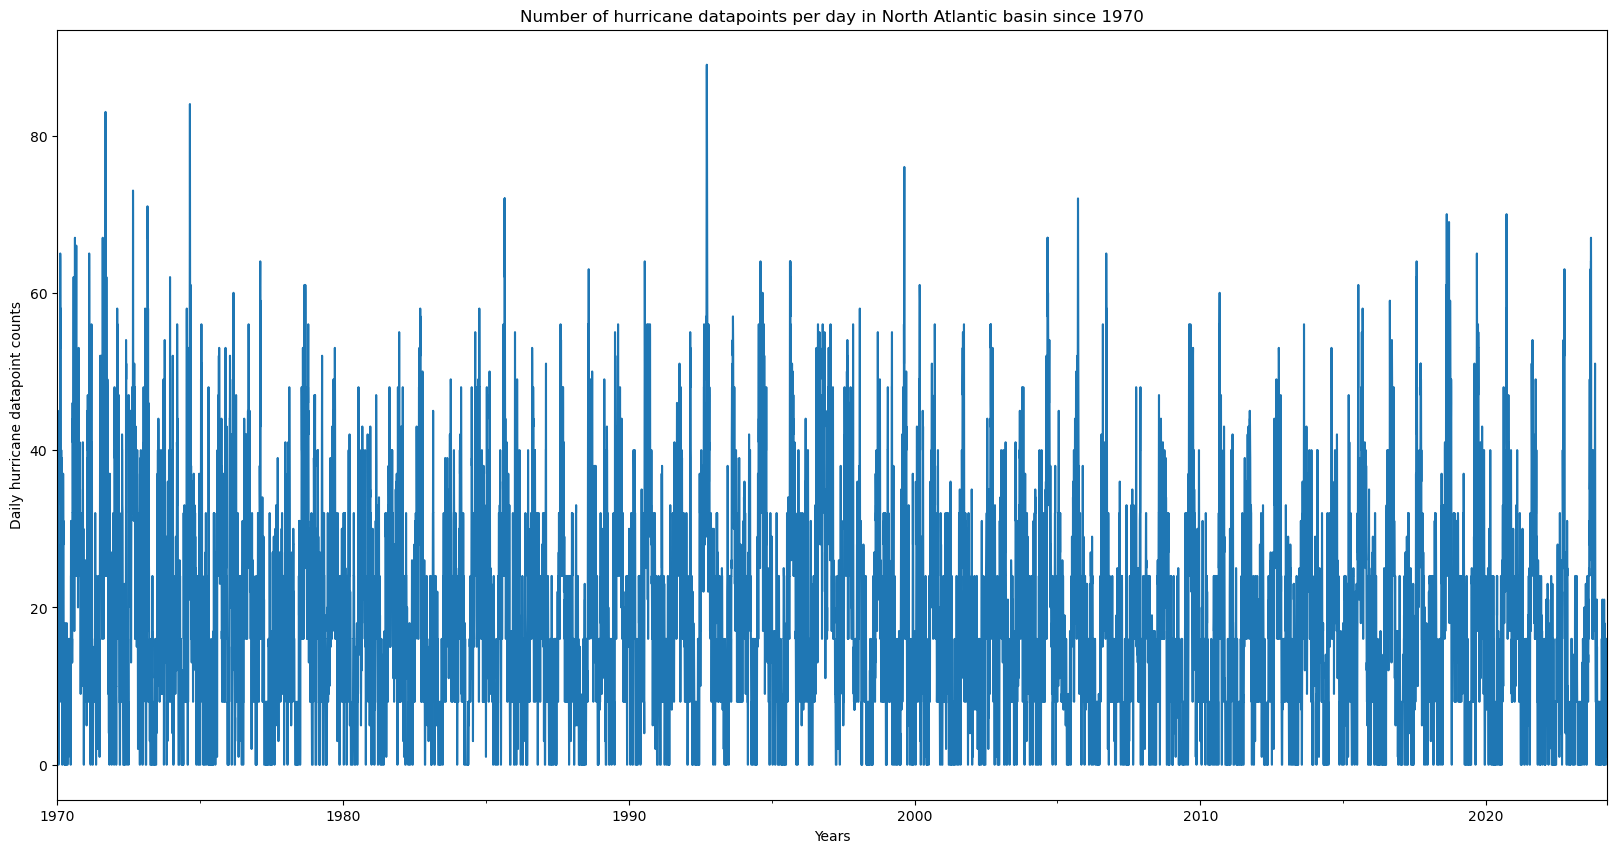

In [331]:
df70NA_D = df70NA['SID'].resample('D').count()

ax = df70NA_D.plot(figsize=(20, 10))
ax.set_ylabel('Daily hurricane datapoint counts')
ax.set_xlabel('Years')
ax.set_title('Number of hurricane datapoints per day in North Atlantic basin since 1970')

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

Text(0.5, 1.0, '...or this plot?')

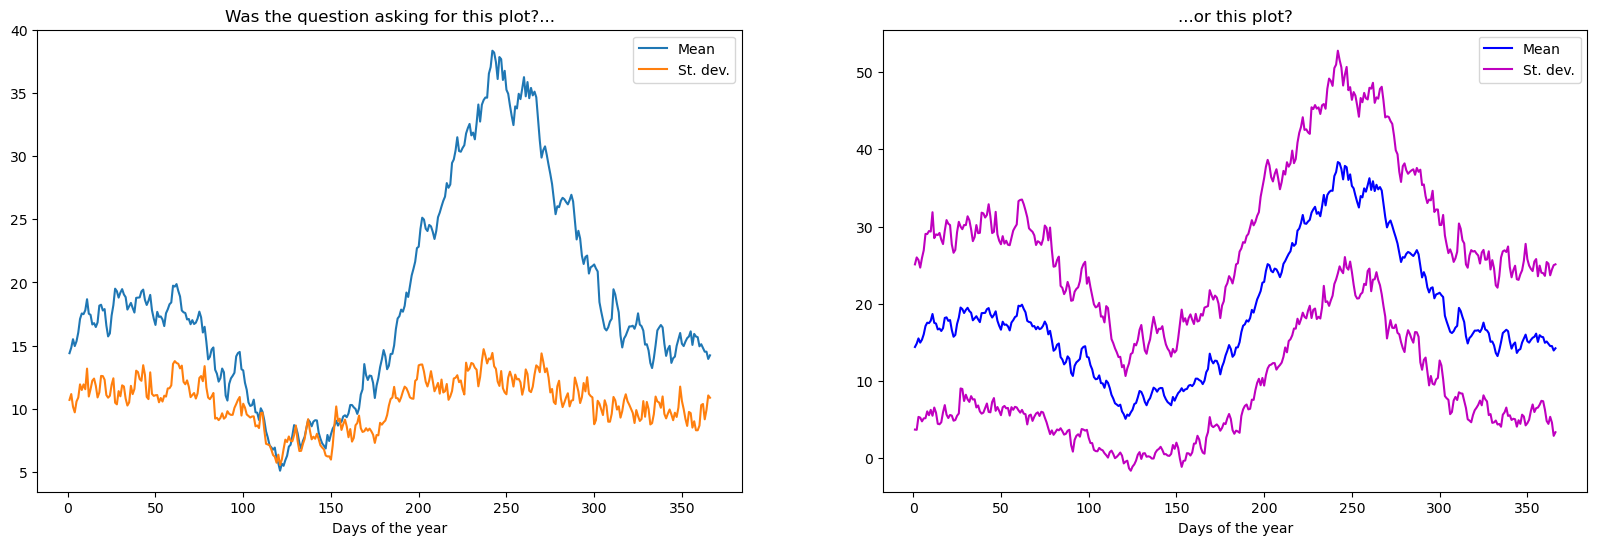

In [333]:
dclimM = df70NA_D.groupby(df70NA_D.index.dayofyear).aggregate('mean')
dclimS = df70NA_D.groupby(df70NA_D.index.dayofyear).aggregate('std')


# not sure which plot is what question is asking for:

fig, ax = plt.subplots(ncols=2,figsize=(20,6))
ax[0].plot(dclimM.index,dclimM)
ax[0].plot(dclimS.index, dclimS)
ax[0].set_xlabel('Days of the year')
ax[0].legend(['Mean','St. dev.'])
ax[0].set_title('Was the question asking for this plot?...')

dclimPlus = dclimM+dclimS
dclimMinus = dclimM-dclimS

ax[1].plot(dclimM.index, dclimM, c='b')
ax[1].plot(dclimPlus.index, dclimPlus, c='m')
ax[1].plot(dclimMinus.index, dclimMinus, c='m')
ax[1].set_xlabel('Days of the year')
ax[1].legend(['Mean','St. dev.'])
ax[1].set_title('...or this plot?')

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

In [334]:
def standardize(x):
    return (x-x.mean())/x.std()

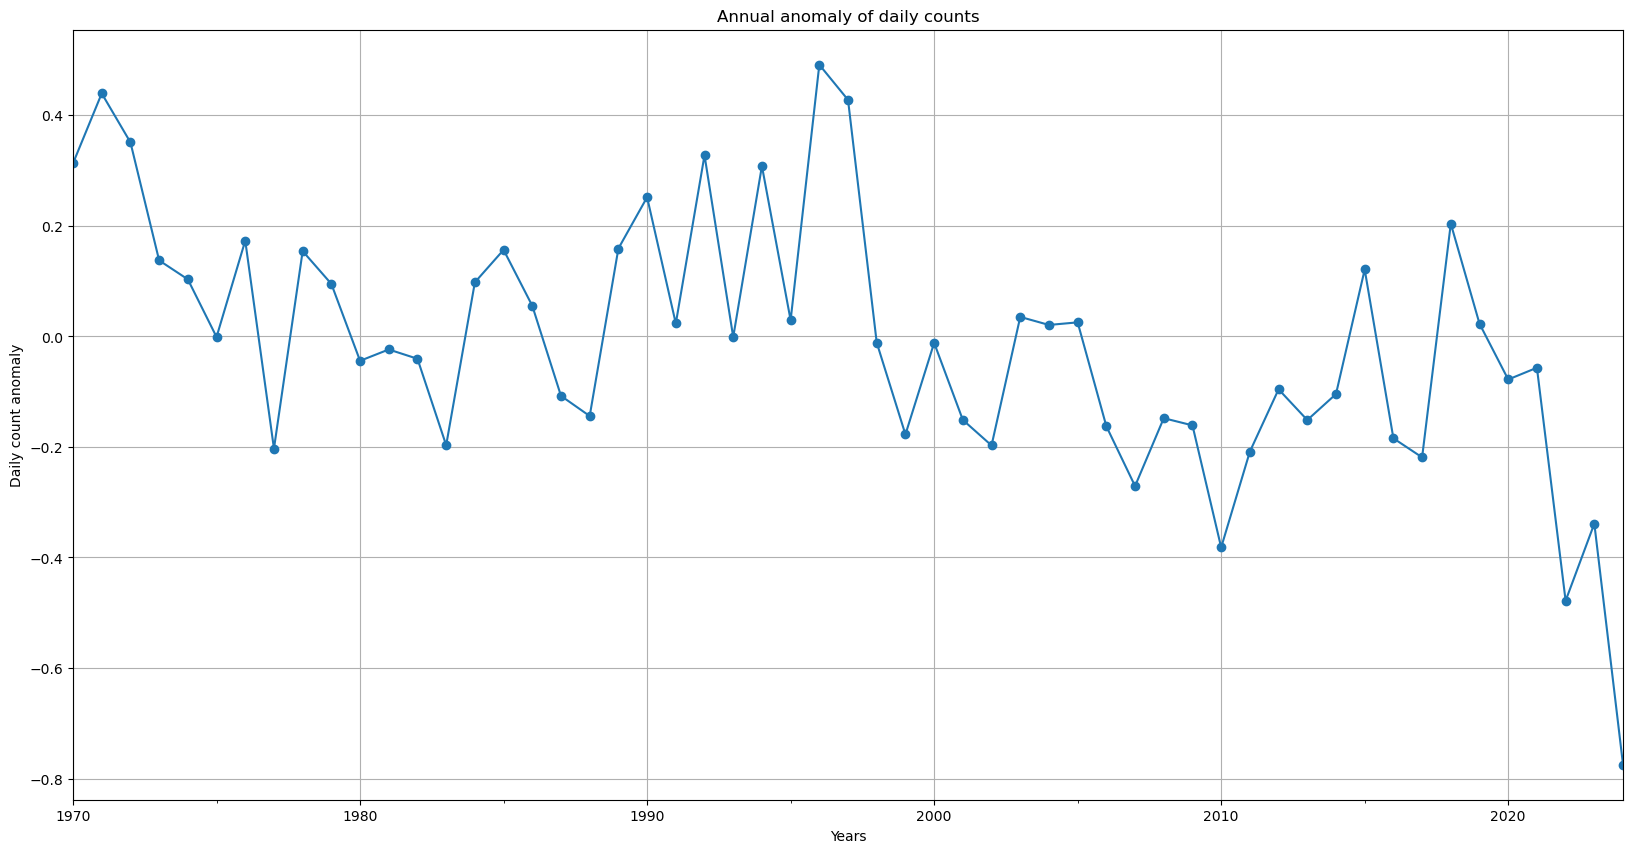

In [335]:
anomaly = df70NA_D.transform(standardize)
anomaly = anomaly.resample('YE').mean()
ax = anomaly.plot(marker='o',figsize=(20, 10))
ax.set_ylabel('Daily count anomaly')
ax.set_xlabel('Years')
ax.set_title('Annual anomaly of daily counts')
ax.grid()

Which years stand out as having anomalous hurricane activity?

In [336]:
# Years with anomalously high hurricane activity (here, defined as anomaly > 0.4)
#  - 1971 
#  - 1996
#  - 1997

# Years with anomalously low hurricane activity (here, defined as anomaly < -0.3)
#  - 2010
#  - 2022
#  - 2023
#  * 2024 is still ongoing, so I am disregarding it.